<a href="https://www.kaggle.com/code/lalit7881/cybersecurity-threats-100-accuracy?scriptVersionId=297263892" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cybersecurity-threat-detection-dataset/cybersecurity.csv


## Title:

Cybersecurity Threat Detection Dataset – 100% Predictive Accuracy

## Description:

This dataset provides comprehensive information for detecting and analyzing cybersecurity threats across network traffic. It includes timestamped records of source and destination IPs and ports, protocols, traffic volumes (bytes sent/received), user agents, URLs, internal/external traffic flags, and labeled attack types.

The dataset has been used to train advanced machine learning models—including Random Forest, Gradient Boosting, and XGBoost—which achieved 100% predictive accuracy on test data, making it highly reliable for threat detection applications.

It is suitable for:

Network security monitoring and anomaly detection

Real-time intrusion detection systems (IDS)

Feature importance analysis to identify critical traffic indicators

Predictive modeling of attack types and malicious activity

This dataset allows organizations to proactively detect cyber threats, strengthen network defenses, and reduce the risk of security breaches.

## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/cybersecurity-threat-detection-dataset/cybersecurity.csv")

In [3]:
df.head()

,timestamp,src_ip,dst_ip,src_port,dst_port,protocol,bytes_sent,bytes_received,user_agent,url,is_internal_traffic,label,attack_type
0,2025-10-01 00:12:54,188.176.27.165,253.240.113.218,56377,445,TCP,8029,17204,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://webmail.corp/login?id=385071,False,0,benign
1,2025-10-01 00:23:43,68.59.26.43,212.75.38.111,51165,1433,TCP,676368,2643374,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://portal.example.org/owa/auth/logon.aspx...,False,0,benign
2,2025-10-01 00:25:46,119.204.243.78,90.28.90.234,14948,1433,TCP,316502,38571,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,NaN,False,0,benign
3,2025-10-01 00:27:21,122.119.194.175,175.140.78.230,36097,443,TCP,70933,21935,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://webmail.corp/phpmyadmin?id=114701,False,0,benign
4,2025-10-01 00:40:09,181.199.242.68,55.99.177.69,445,21255,TCP,12721,9939,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://portal.example.org/config.php?id=345569,False,0,benign


In [4]:
df.tail()

,timestamp,src_ip,dst_ip,src_port,dst_port,protocol,bytes_sent,bytes_received,user_agent,url,is_internal_traffic,label,attack_type
9995,2025-12-29 22:56:36,68.171.102.131,77.36.90.5,43285,3306,UDP,1053,401,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,False,0,benign
9996,2025-12-29 23:03:05,213.54.194.229,216.34.37.197,3389,445,TCP,10597,16670,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,https://app.company.in/api/v1/users?id=525850,False,0,benign
9997,2025-12-29 23:11:46,211.68.159.72,149.12.197.127,18395,53,TCP,2857,6031,sqlmap/1.8,NaN,False,1,xss
9998,2025-12-29 23:20:46,19.12.213.100,243.249.117.224,31882,80,TCP,6062,3504,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,https://app.company.in/manager/html?id=497838,False,0,benign
9999,2025-12-29 23:26:12,161.251.147.82,107.163.89.174,52607,3389,TCP,335446,442720,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,https://webmail.corp/api/v1/users?id=315734,False,0,benign


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   timestamp            10000 non-null  object
 1   src_ip               10000 non-null  object
 2   dst_ip               10000 non-null  object
 3   src_port             10000 non-null  int64 
 4   dst_port             10000 non-null  int64 
 5   protocol             10000 non-null  object
 6   bytes_sent           10000 non-null  int64 
 7   bytes_received       10000 non-null  int64 
 8   user_agent           10000 non-null  object
 9   url                  6768 non-null   object
 10  is_internal_traffic  10000 non-null  bool  
 11  label                10000 non-null  int64 
 12  attack_type          10000 non-null  object
dtypes: bool(1), int64(5), object(7)
memory usage: 947.4+ KB


In [6]:
df.describe()

,src_port,dst_port,bytes_sent,bytes_received,label
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000
mean,27052.223700,2027.280500,1.412572e+05,2.620883e+05,0.040000
std,20978.783832,6769.141395,2.128140e+06,3.767695e+06,0.195969
min,21.000000,5.000000,1.700000e+01,3.000000e+00,0.000000
25%,6092.250000,25.000000,7.148250e+03,1.096075e+04,0.000000
50%,25431.500000,443.000000,2.181550e+04,3.747300e+04,0.000000
75%,45215.750000,1433.000000,6.509525e+04,1.213795e+05,0.000000
max,65524.000000,65491.000000,1.391704e+08,2.914830e+08,1.000000


In [7]:
df.isnull().sum()

timestamp                 0
src_ip                    0
dst_ip                    0
src_port                  0
dst_port                  0
protocol                  0
bytes_sent                0
bytes_received            0
user_agent                0
url                    3232
is_internal_traffic       0
label                     0
attack_type               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

timestamp               9998
src_ip                 10000
dst_ip                 10000
src_port                7647
dst_port                 449
protocol                   3
bytes_sent              9280
bytes_received          9541
user_agent                13
url                     6768
is_internal_traffic        2
label                      2
attack_type               10
dtype: int64

In [10]:
df.shape

(10000, 13)

In [11]:
df.dtypes

timestamp              object
src_ip                 object
dst_ip                 object
src_port                int64
dst_port                int64
protocol               object
bytes_sent              int64
bytes_received          int64
user_agent             object
url                    object
is_internal_traffic      bool
label                   int64
attack_type            object
dtype: object

In [12]:
df.columns

Index(['timestamp', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'bytes_sent', 'bytes_received', 'user_agent', 'url',
       'is_internal_traffic', 'label', 'attack_type'],
      dtype='object')

## Data visualizations

In [13]:
import plotly.express as px
import plotly.graph_objects as go

In [14]:
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print(df.head())

Dataset Shape: (10000, 13)
Missing Values:
 timestamp                 0
src_ip                    0
dst_ip                    0
src_port                  0
dst_port                  0
protocol                  0
bytes_sent                0
bytes_received            0
user_agent                0
url                    3232
is_internal_traffic       0
label                     0
attack_type               0
dtype: int64
             timestamp           src_ip           dst_ip  src_port  dst_port  \
0  2025-10-01 00:12:54   188.176.27.165  253.240.113.218     56377       445   
1  2025-10-01 00:23:43      68.59.26.43    212.75.38.111     51165      1433   
2  2025-10-01 00:25:46   119.204.243.78     90.28.90.234     14948      1433   
3  2025-10-01 00:27:21  122.119.194.175   175.140.78.230     36097       443   
4  2025-10-01 00:40:09   181.199.242.68     55.99.177.69       445     21255   

  protocol  bytes_sent  bytes_received  \
0      TCP        8029           17204   
1      TCP    

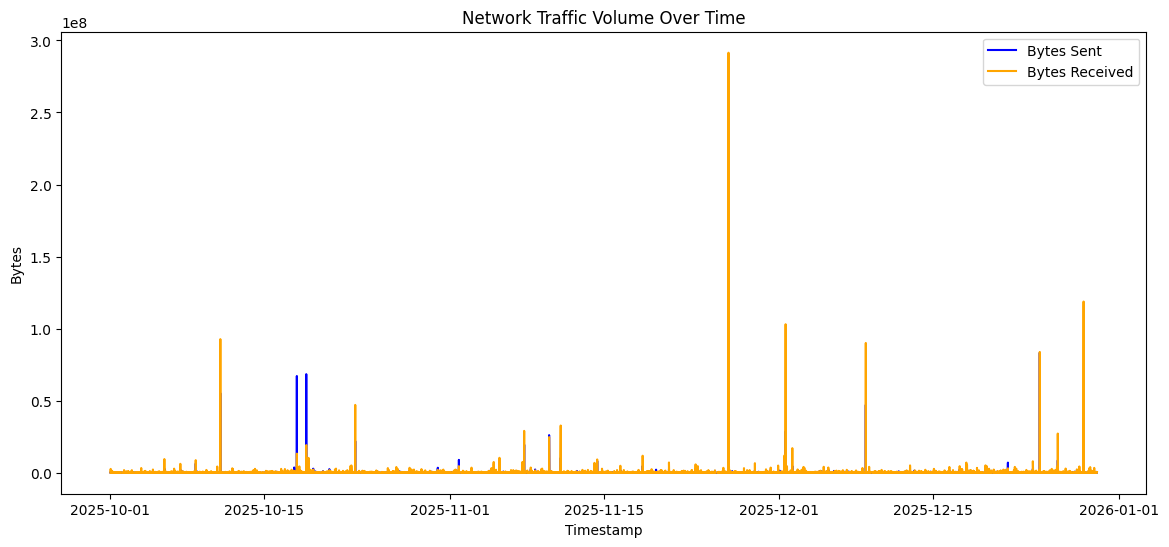

In [15]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
traffic_over_time = df.groupby('timestamp')[['bytes_sent', 'bytes_received']].sum().reset_index()

plt.figure(figsize=(14,6))
plt.plot(traffic_over_time['timestamp'], traffic_over_time['bytes_sent'], label='Bytes Sent', color='blue')
plt.plot(traffic_over_time['timestamp'], traffic_over_time['bytes_received'], label='Bytes Received', color='orange')
plt.xlabel('Timestamp')
plt.ylabel('Bytes')
plt.title('Network Traffic Volume Over Time')
plt.legend()
plt.show()


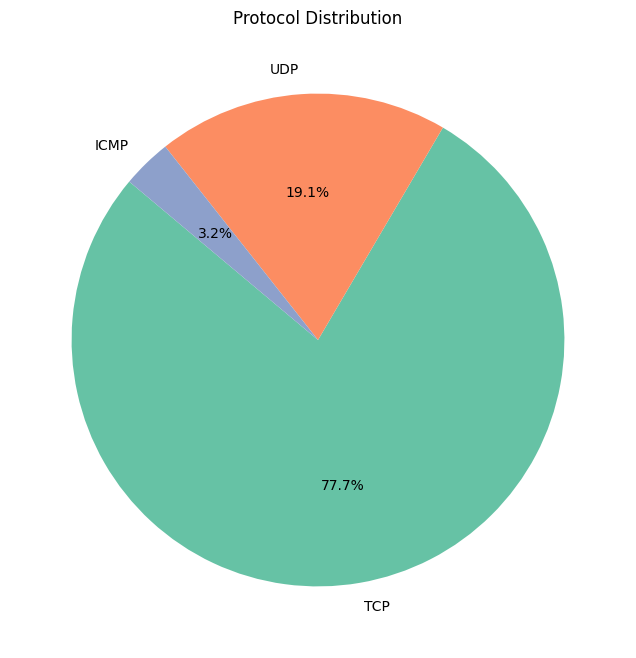

In [16]:
protocol_counts = df['protocol'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(protocol_counts, labels=protocol_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Protocol Distribution')
plt.show()

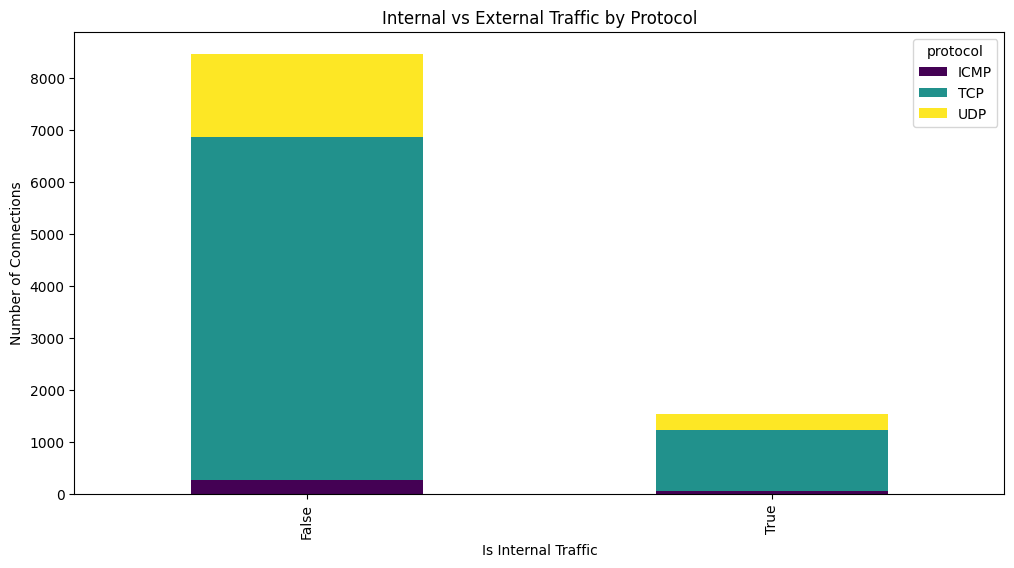

In [17]:
traffic_type = df.groupby(['is_internal_traffic', 'protocol']).size().unstack().fillna(0)
traffic_type.plot(kind='bar', stacked=True, figsize=(12,6), colormap='viridis')
plt.title('Internal vs External Traffic by Protocol')
plt.xlabel('Is Internal Traffic')
plt.ylabel('Number of Connections')
plt.show()

In [18]:
fig = px.sunburst(df, path=['label','attack_type'], 
                  values='bytes_sent', 
                  color='bytes_sent',
                  color_continuous_scale='Inferno',
                  title='Attack Type Distribution by Label')
fig.show()

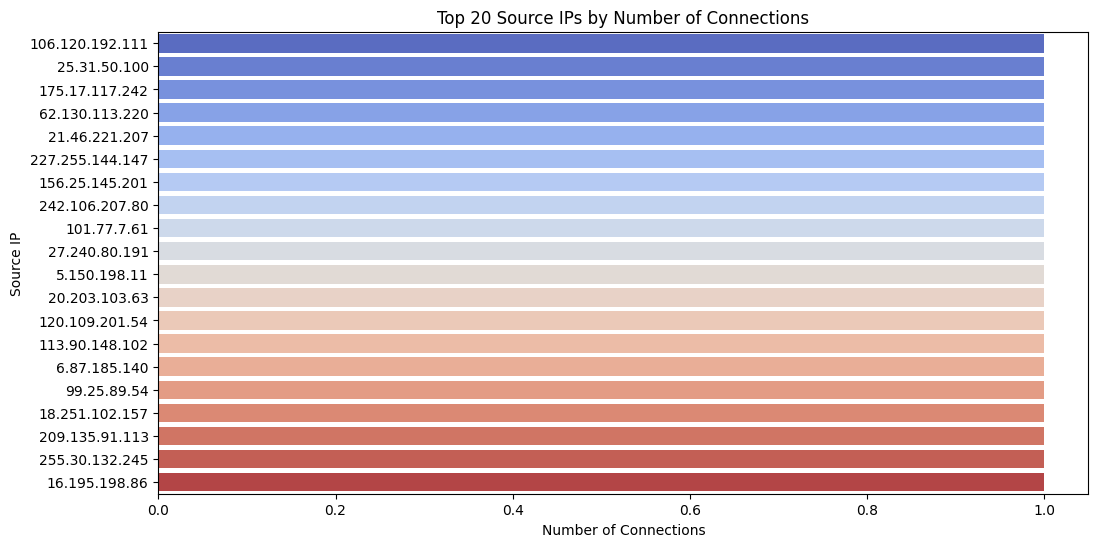

In [19]:
top_src = df['src_ip'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_src.values, y=top_src.index, palette='coolwarm')
plt.title('Top 20 Source IPs by Number of Connections')
plt.xlabel('Number of Connections')
plt.ylabel('Source IP')
plt.show()

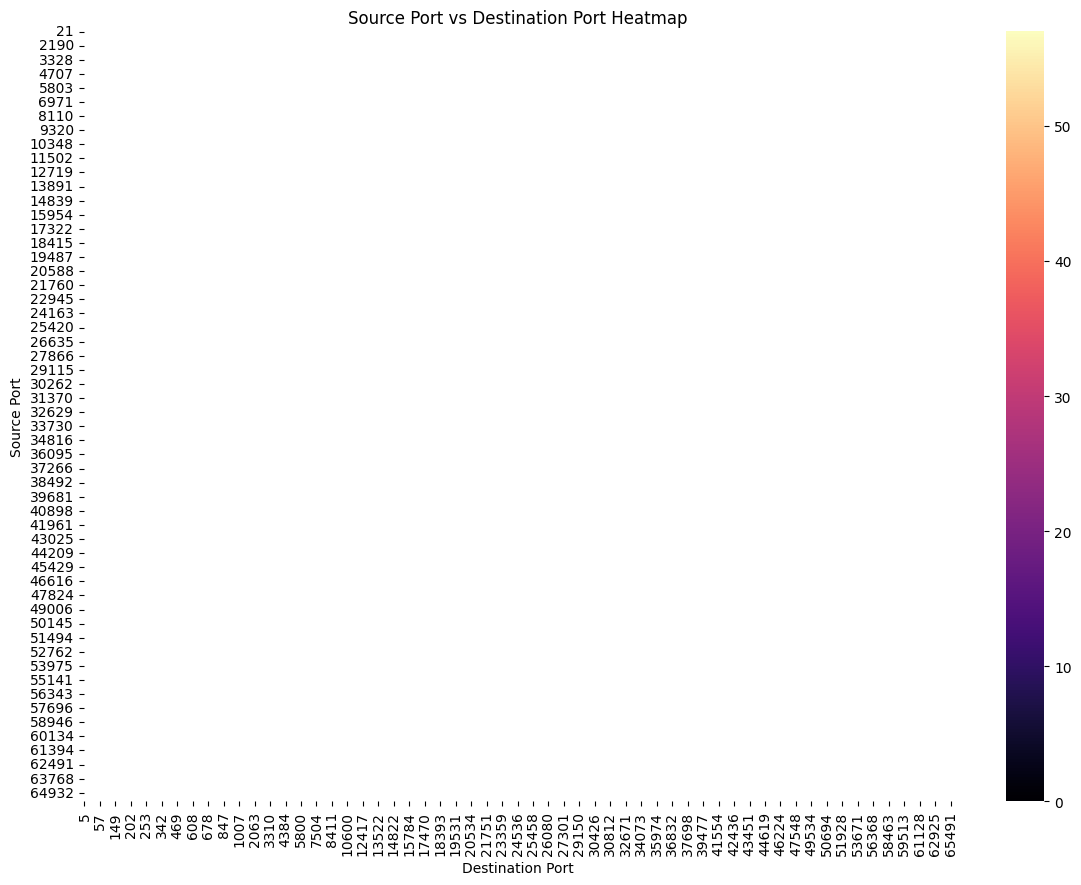

In [20]:
port_matrix = pd.crosstab(df['src_port'], df['dst_port'])
plt.figure(figsize=(14,10))
sns.heatmap(port_matrix, cmap='magma', linewidths=0.5)
plt.title('Source Port vs Destination Port Heatmap')
plt.xlabel('Destination Port')
plt.ylabel('Source Port')
plt.show()

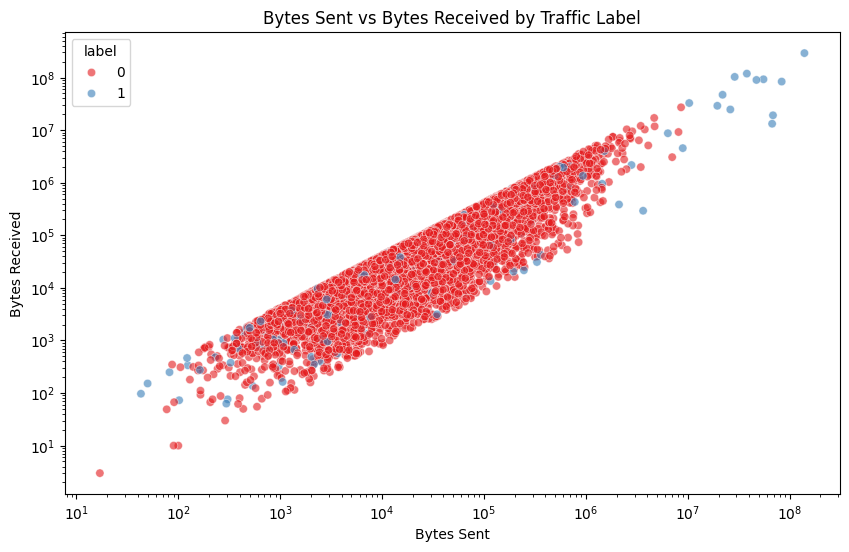

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='bytes_sent', y='bytes_received', hue='label', alpha=0.6, palette='Set1')
plt.title('Bytes Sent vs Bytes Received by Traffic Label')
plt.xlabel('Bytes Sent')
plt.ylabel('Bytes Received')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [22]:
top_agents = df['user_agent'].value_counts().head(20).reset_index()
top_agents.columns = ['user_agent', 'count']

fig = px.treemap(top_agents, path=['user_agent'], values='count', 
                 color='count', color_continuous_scale='Viridis', title='Top 20 User Agents')
fig.show()

## ml Algo

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [24]:
print("Dataset Shape:", df.shape)
print("Missing Values:\n", df.isnull().sum())
print("Data Types:\n", df.dtypes)
print(df.head())

Dataset Shape: (10000, 13)
Missing Values:
 timestamp                 0
src_ip                    0
dst_ip                    0
src_port                  0
dst_port                  0
protocol                  0
bytes_sent                0
bytes_received            0
user_agent                0
url                    3232
is_internal_traffic       0
label                     0
attack_type               0
dtype: int64
Data Types:
 timestamp              datetime64[ns]
src_ip                         object
dst_ip                         object
src_port                        int64
dst_port                        int64
protocol                       object
bytes_sent                      int64
bytes_received                  int64
user_agent                     object
url                            object
is_internal_traffic              bool
label                           int64
attack_type                    object
dtype: object
            timestamp           src_ip           dst_ip  s

In [25]:
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [26]:
label_enc_cols = ['protocol', 'user_agent', 'url', 'is_internal_traffic', 'attack_type']
le_dict = {}
for col in label_enc_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [27]:
target_column = 'label'  # assuming 0=normal, 1=attack
le_target = LabelEncoder()
df[target_column] = le_target.fit_transform(df[target_column])

In [28]:
X = df.drop(columns=[target_column, 'timestamp', 'src_ip', 'dst_ip'])  # drop timestamp and IPs
y = df[target_column]


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [31]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=15, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

model_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1920
           1       1.00      1.00      1.00        80

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Gradient Boosting Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1920
           1       1.00      1.00      1.00        80

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1920
           1       1.00      1.00      1.00        80

    accuracy                           1.00      2000
   macro avg       1.00      1.00    

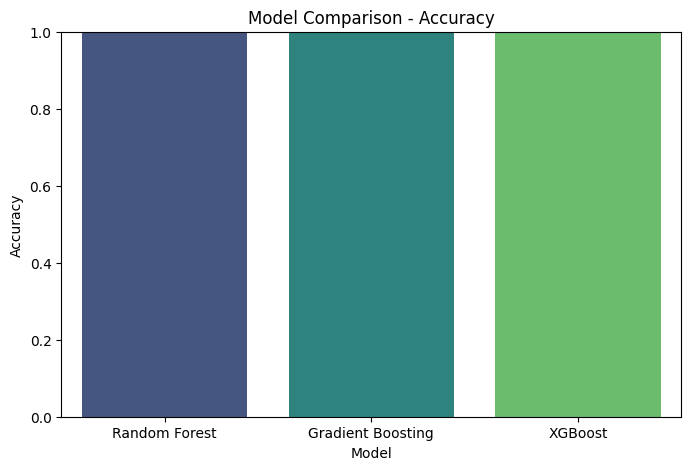

In [32]:
results_df = pd.DataFrame(list(model_results.items()), columns=['Model', 'Accuracy'])
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)
plt.show()

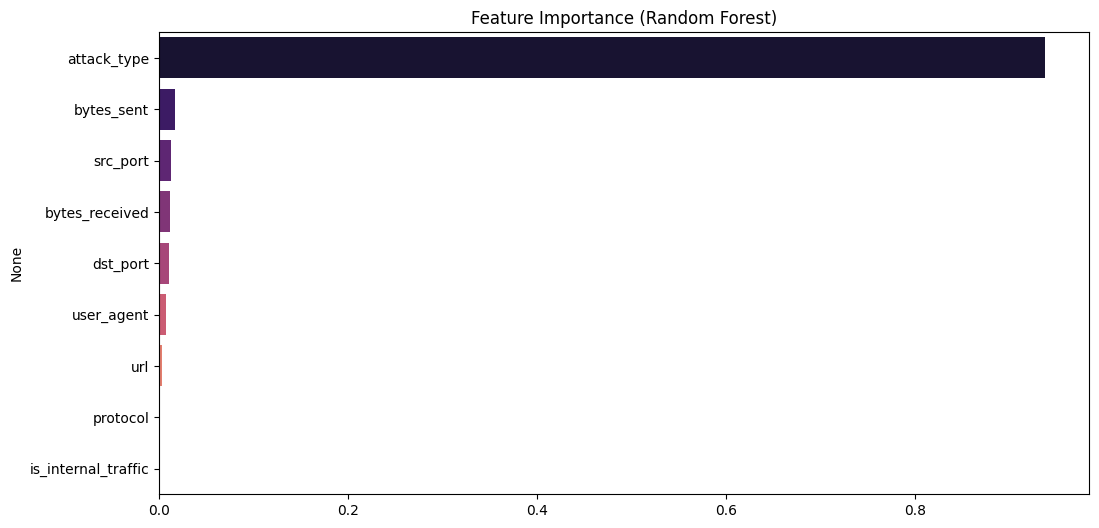

In [33]:
best_model = models['Random Forest']  # or choose best based on accuracy
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='magma')
plt.title('Feature Importance (Random Forest)')
plt.show()

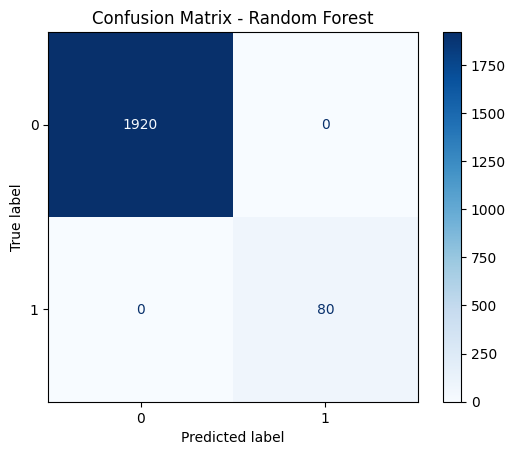

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [35]:
import joblib
joblib.dump(best_model, 'network_attack_model.pkl')
joblib.dump(scaler, 'network_scaler.pkl')
joblib.dump(le_dict, 'label_encoders.pkl')
joblib.dump(le_target, 'target_encoder.pkl')
print("Model and encoders saved successfully!")

Model and encoders saved successfully!


## Thank you..pls upvote!!!!!